In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statstests.process import stepwise
from sklearn.metrics import roc_curve, auc

In [27]:
df_challenger = pd.read_csv('data/challenger.csv', delimiter=',')

df_challenger.loc[df_challenger['desgaste'] != 0 , 'falha'] = 1
df_challenger.loc[df_challenger['desgaste'] == 0, 'falha'] = 0
df_challenger['falha'] = df_challenger['falha'].astype('int64')

df_challenger.head()

,desgaste,temperatura,pressão,t,falha
0,0,66,50,1,0
1,1,70,50,2,1
2,0,69,50,3,0
3,0,68,50,4,0
4,0,67,50,5,0


In [28]:
#%% Função para calcular a temperatura em ºC a partir da temperatura em ºF:
    
def celsius(far):
    celsius = 5*((far-32)/9)
    print(celsius)
    
celsius(70)
celsius(77)
celsius(34) # temperatura no dia do lançamento

21.11111111111111
25.0
1.1111111111111112


In [29]:
modelo_challenger = sm.Logit.from_formula('falha ~ temperatura + pressão',
                                          df_challenger).fit()

# Estimação do modelo por meio do procedimento Stepwise
step_challenger = stepwise(modelo_challenger, pvalue_limit=0.05)

Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8
Regression type: Logit 

Estimating model...: 
 falha ~ Q('temperatura') + Q('pressão')
Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8

 Discarding atribute "Q('pressão')" with p-value equal to 0.5378022290437207 

Estimating model...: 
 falha ~ Q('temperatura')
Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('pressão')", 'p-value': 0.5378022290437207}

 Model after stepwise process...: 
 falha ~ Q('temperatura') 

                           Logit Regression Results                           
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                 

In [30]:
df_challenger['phat'] = step_challenger.predict()

In [31]:
#%% Log-Lik
step_challenger.llf # poucas observações

-7.212895816611514

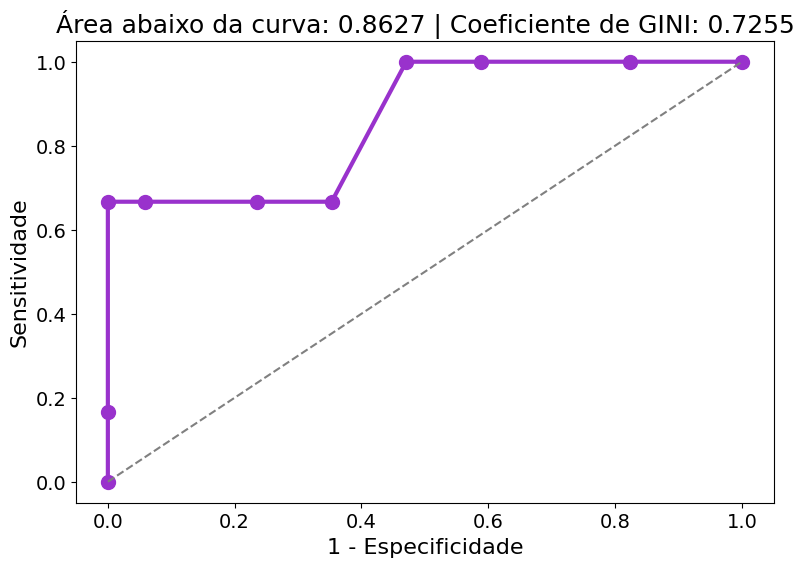

In [32]:
#%% ROC
# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_challenger['falha'], df_challenger['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=18)
plt.xlabel('1 - Especificidade', fontsize=16)
plt.ylabel('Sensitividade', fontsize=16)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()